### Importing packages

In [1]:
import datetime

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

### Loading Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualizing the data

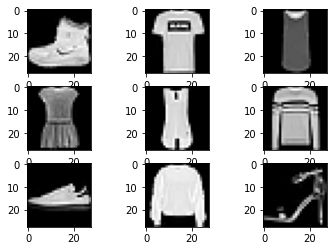

In [4]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    
plt.show()

### Splitting the data

In [5]:
pt_x_train = []
pt_y_train = []
pt_x_test = []
pt_y_test = []

tl_x_train = []
tl_y_train = []
tl_x_test = []
tl_y_test = []

for i in range(len(x_train)):
    if y_train[i] < 5:
        pt_x_train.append(x_train[i] / 255) # Normalize
        pt_y_train.append(y_train[i])
    else:
        tl_x_train.append(x_train[i] / 255)
        tl_y_train.append(y_train[i])
        
for i in range(len(x_test)):
    if y_test[i] < 5:
        pt_x_test.append(x_test[i] / 255)
        pt_y_test.append(y_test[i])
    else:
        tl_x_test.append(x_test[i] / 255)
        tl_y_test.append(y_test[i])

### Reshaping data

In [6]:
pt_x_train = np.asarray(pt_x_train).reshape(-1, 28, 28, 1)
pt_x_test = np.asarray(pt_x_test).reshape(-1, 28, 28, 1)
pt_y_train = np_utils.to_categorical(np.asarray(pt_y_train))
pt_y_test = np_utils.to_categorical(np.asarray(pt_y_test))

tl_x_train = np.asarray(tl_x_train).reshape(-1, 28, 28, 1)
tl_x_test = np.asarray(tl_x_test).reshape(-1, 28, 28, 1)
tl_y_train = np_utils.to_categorical(np.asarray(tl_y_train))
tl_y_test = np_utils.to_categorical(np.asarray(tl_y_test))

print("Pre Training [Train and Test data]")
print(pt_x_train.shape, pt_y_train.shape)
print(pt_x_test.shape, pt_y_test.shape)

print("\nTransfer Learning [Train and Test data]")
print(tl_x_train.shape, tl_y_train.shape)
print(tl_x_test.shape, tl_y_test.shape)

Pre Training [Train and Test data]
(30000, 28, 28, 1) (30000, 5)
(5000, 28, 28, 1) (5000, 5)

Transfer Learning [Train and Test data]
(30000, 28, 28, 1) (30000, 10)
(5000, 28, 28, 1) (5000, 10)


### Model - Pre-train

In [7]:
# Pre-Train

model = Sequential()

model.add(Conv2D(32, 5, input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(16, 5, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Conv2D(8, 3, activation = 'relu'))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(128, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [8]:
start = datetime.datetime.now()

model.fit(pt_x_train, pt_y_train,
         validation_data = (pt_x_test, pt_y_test),
         epochs = 10,
         shuffle = True,
         batch_size = 100,
         verbose = 2)

end = datetime.datetime.now()
print('\n Time taken for pre-train model: ', end - start)

Epoch 1/10
300/300 - 38s - loss: 0.5192 - accuracy: 0.8014 - val_loss: 0.3567 - val_accuracy: 0.8620
Epoch 2/10
300/300 - 37s - loss: 0.3249 - accuracy: 0.8815 - val_loss: 0.2798 - val_accuracy: 0.8972
Epoch 3/10
300/300 - 36s - loss: 0.2761 - accuracy: 0.8990 - val_loss: 0.2547 - val_accuracy: 0.9048
Epoch 4/10
300/300 - 36s - loss: 0.2505 - accuracy: 0.9097 - val_loss: 0.2195 - val_accuracy: 0.9202
Epoch 5/10
300/300 - 36s - loss: 0.2293 - accuracy: 0.9170 - val_loss: 0.2050 - val_accuracy: 0.9278
Epoch 6/10
300/300 - 36s - loss: 0.2197 - accuracy: 0.9194 - val_loss: 0.2007 - val_accuracy: 0.9294
Epoch 7/10
300/300 - 36s - loss: 0.2030 - accuracy: 0.9283 - val_loss: 0.2032 - val_accuracy: 0.9276
Epoch 8/10
300/300 - 36s - loss: 0.1970 - accuracy: 0.9285 - val_loss: 0.1906 - val_accuracy: 0.9344
Epoch 9/10
300/300 - 36s - loss: 0.1878 - accuracy: 0.9318 - val_loss: 0.1833 - val_accuracy: 0.9354
Epoch 10/10
300/300 - 36s - loss: 0.1820 - accuracy: 0.9349 - val_loss: 0.1761 - val_accura

### Making Conv layers untrainable

In [9]:
model.layers

In [10]:
for layer in model.layers[:6]:
    layer.trainable = False
    
for layer in model.layers:
    print(layer.trainable)

False
False
False
False
False
False
True
True


### Transfer Learning Model

In [11]:
# Transfer Learning model

tl_model = Sequential(model.layers[:6])

tl_model.add(Dense(128, activation = 'relu'))
tl_model.add(Dense(10, activation = 'softmax'))

tl_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

tl_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [12]:
start = datetime.datetime.now()

history = tl_model.fit(tl_x_train, tl_y_train,
            validation_data = (tl_x_test, tl_y_test),
            epochs = 10,
            shuffle = True,
            batch_size = 100,
            verbose = 2)

end = datetime.datetime.now()
print('\n Time taken for transfer learning model: ', end - start)

Epoch 1/10
300/300 - 8s - loss: 0.3098 - accuracy: 0.9026 - val_loss: 0.1660 - val_accuracy: 0.9410
Epoch 2/10
300/300 - 8s - loss: 0.1749 - accuracy: 0.9380 - val_loss: 0.1373 - val_accuracy: 0.9484
Epoch 3/10
300/300 - 7s - loss: 0.1566 - accuracy: 0.9425 - val_loss: 0.1338 - val_accuracy: 0.9516
Epoch 4/10
300/300 - 7s - loss: 0.1483 - accuracy: 0.9453 - val_loss: 0.1259 - val_accuracy: 0.9542
Epoch 5/10
300/300 - 7s - loss: 0.1398 - accuracy: 0.9497 - val_loss: 0.1203 - val_accuracy: 0.9566
Epoch 6/10
300/300 - 7s - loss: 0.1328 - accuracy: 0.9527 - val_loss: 0.1156 - val_accuracy: 0.9576
Epoch 7/10
300/300 - 8s - loss: 0.1262 - accuracy: 0.9547 - val_loss: 0.1120 - val_accuracy: 0.9600
Epoch 8/10
300/300 - 7s - loss: 0.1202 - accuracy: 0.9557 - val_loss: 0.1078 - val_accuracy: 0.9592
Epoch 9/10
300/300 - 7s - loss: 0.1148 - accuracy: 0.9591 - val_loss: 0.1124 - val_accuracy: 0.9580
Epoch 10/10
300/300 - 7s - loss: 0.1141 - accuracy: 0.9581 - val_loss: 0.1061 - val_accuracy: 0.9624

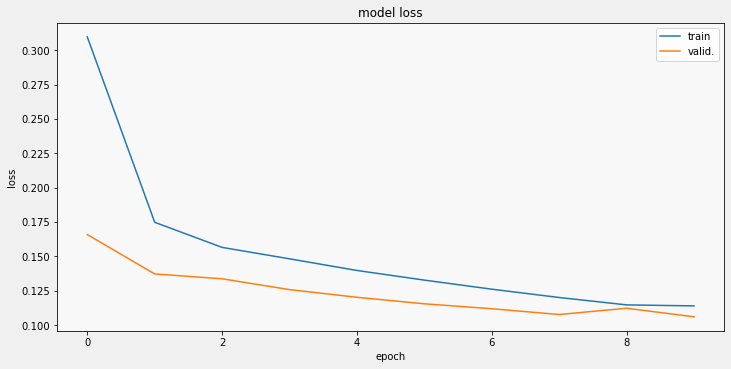

In [13]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])
    
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 211)